# <div style="background-color:lightblue; text-align:center; vertical-align: middle; padding:40px 0;"><p style="font-family: Arial; font-size:1em; color:BLACK; text-align: center;"> Text Classification using Keras Deep Learning Python Library </p></div>

# <p style="font-family: Arial; font-size:1.1em;color:#3498DB;"> Overview</p>

* Text classification or text categorization is an activity of labelling natural language texts with relevant predefined categories. The idea is to automatically organize text in different classes. It can drastically simplify and speed-up your search through the documents or texts!

* This project will focus on algorithmical methods, exactly Deep learning algorithms which are widely used in information science and computer science. There are many public text dataset online for classification, here, I will apply classification algorithms on All_ticket dataset, which has a collection of different messages, collected from different ticket types. 

# <p style="font-family: Arial; font-size:1em;color:#3498DB;"> Problem Statement </p> 
### <div style="background-color:#f2f2f2; text-align:center; vertical-align: middle; padding:40px 0;"><p>Train a deep neural network for classification tickets(‘body’ column) data with respect to ‘urgency’</p></div>




* The classification of All_Ticket dataset is a supervised classification problem, there are 9 ticket categories, each piece body belongs to one category, the goal is to extract proper features and build an effective model to assign each piece of body to the correct category.
* I will explore the dataset in the beginning on the training part, then extract useful keywords and build vectors of features from the texts of body, based on those vectors I will use several classfication methods to do classification, compare the efficiency of these classifiers on the testing data and choose one as final model. 


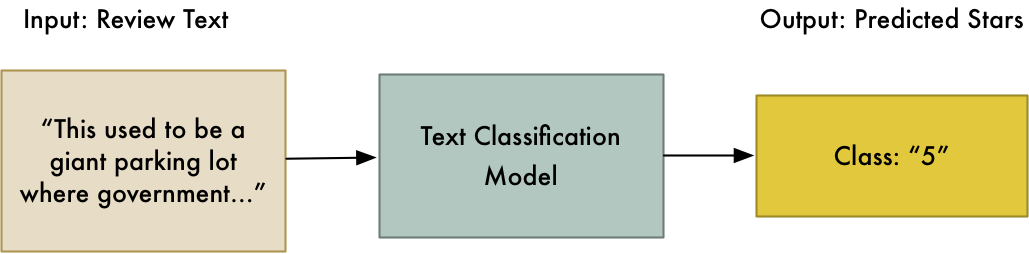

# <p style="font-family: Arial; font-size:1em;color:#3498DB;"> Project description </p> 

* This case study shows how to create a model for text analysis and classification and automatically classify support tickets.

* What will you find inside:
    * How to clean and prepare text data and featurize it to make it valuable for Deep learning scenarios
    * How to strip the data from any sensitive information and also anonymize it.
    * How to create a classification model using Python modules like:  sklearn, nltk, keras, matplotlib, pandas.


# <font style=color:#3498DB;>Data </font>

### About this Dataset
* Context
    * 1_Dataset - body column
    * 2_train_and_eval_model- column_to_predict variable is used to determine which column should be used for classification

* column_to_predict = "urgency"
* Supported datasets:
    * title
    * ticket_type
    * business_service
    * category
    * impact
    * urgency
    * sub_category1
    * sub_category2



* This dataset is a collection of Ticket type documents. The dataset has become a popular data set for experiments in text applications of Deep learning techniques, such as text classification and text clustering.

#### Content
   * There is file (train.csv) that contains train dataset. 
   * There is file (validation.csv) that contains validation dataset.


* Example of train data


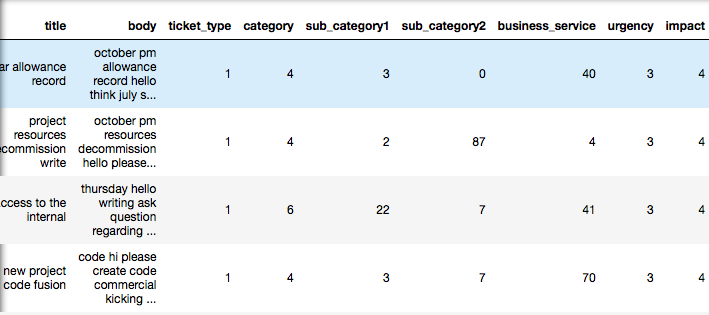

### Inspiration
* This dataset text can be used to classify text documents




# <font color='#3498DB'> Implemented Models </font>




 ___
<a name="(1)-Baseline-Model"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(1) Baseline Model</font></p>](#(1)-Baseline-Model)

<a name="(2)-1D-convnet-using-Dropout"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(2) 1D convnet using Dropout</font></p>](#(2)-1D-convnet-using-Dropout)

<a name="(3)-1D-convnet"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(3) 1D convnet</font></p>](#(3)-1D-convnet)

<a name="(4)-LSTM"></a>[<p style="font-size:1.5em;"><font color='darkblue'> (4) LSTM</font></p>](#(4)-LSTM)

 <a name="(5)-Simple-RNN"></a>[<p style="font-size:1.5em;"><font color='darkblue'>(5) Simple RNN</font></p>](#(5)-Simple-RNN)
___



# <font color='#3498DB'> Metrics </font>



<b>accuracy:</b>  
The proportion of correct labels that we made if we apply our model to the training dataset. Ideal accuracy is 100%.

# Introducing Keras

* Keras is a deep learning and neural networks API by François Chollet which is capable of running on top of Tensorflow (Google), Theano or CNTK (Microsoft).

#### Here's how we will solve the classification problem:

* convert all text samples in the dataset into sequences of word indices. A "word index" would simply be an integer ID for the word. We will only consider the top 1000 most commonly occuring words in the dataset, and we will truncate the sequences to a maximum length of 400 words.
* prepare an "embedding matrix" which will contain at index i the embedding vector for the word of index i in our word index.
* load this embedding matrix into a Keras Embedding layer, set to be frozen (its weights, the embedding vectors, will not be updated during training).
* build on top of it a 1D convolutional neural network, ending in a softmax output over our 4 categories.



# Import Data and basic data manipulation

## Import Needed libraries


In [175]:
import sys 
import os
import numpy as np# basic calculation
import pandas as pd

import matplotlib # graphs, plots
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from keras.utils.np_utils import to_categorical
from keras import utils
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV



from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.models import Model


from keras.preprocessing.text import Tokenizer #for tokenization
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import  LabelEncoder 


from keras.utils.np_utils import to_categorical # to convert categorical variable
from keras import utils as np_utils
from keras.utils import to_categorical
from keras import utils


from sklearn.model_selection import train_test_split #Split the dataset

#For model
from keras.layers import Dense, Input, Flatten, merge, LSTM, Lambda, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import SimpleRNN, GRU # Import layers from Keras
from keras.layers import Activation, Dense, Dropout
from keras.layers.wrappers import TimeDistributed, Bidirectional
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution1D, GlobalMaxPooling1D, GlobalAveragePooling1D,GlobalMaxPool1D
from keras.layers import GlobalMaxPooling1D, MaxPooling1D, Bidirectional, SpatialDropout1D, concatenate,Concatenate
from keras.layers.merge import concatenate
from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from keras import backend as K
from pathlib import Path
import codecs


from sklearn.metrics import confusion_matrix



### get working directory

In [169]:
import os
os.getcwd()

'/Users/priyavivekbhandarkar/Desktop/INSOFE/Text'

### current working Directory

In [170]:
os.chdir('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/HOT/20news_18828')


### Read train and validation dataset (.csv file)

<b>Reading the data into dataframes</b>

In [255]:
Train_text = pd.read_csv("/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/Train.csv", encoding='latin-1')
Val_Text = pd.read_csv("/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/Validation.csv", encoding='latin-1')


## Understanding The Train Dataset

#### See the above part of the train dataset

* View the 5 rows of dataset from Top.
* body and title columns have text data.
* All other columns have numeric data.

In [4]:
Train_text.head(5)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,car allowance record,october pm allowance record hello think july s...,1,4,3,0,40,3,4
1,project resources decommission write,october pm resources decommission hello please...,1,4,2,87,4,3,4
2,access to the internal,thursday hello writing ask question regarding ...,1,6,22,7,41,3,4
3,new project code fusion,code hi please create code commercial kicking ...,1,4,3,7,70,3,4
4,password reset for,re available has assigned hi guys did till rec...,1,4,2,88,4,3,4


#### See the below part of the train dataset

In [5]:
Train_text.tail()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
43689,NaN,hello left her please submit her until code thank,1,4,2,21,68,3,4
43690,access expenses mailbox,mailbox hello please colleague common mailbox ...,1,4,1,7,36,3,4
43691,new delivery,hello received today po black cooler notebook ...,1,5,13,7,32,3,4
43692,please set up as line manager for,please hi guys please help out by thanks,1,4,3,7,67,3,4
43693,license,wednesday november pm hi please installing com...,1,4,1,7,54,3,4


#### See the above part of the validation dataset

## Understanding The validation Dataset

In [6]:
Val_Text.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,new starter martinez bogota,friday november pm re martinez starter form co...,1,4,2,94,40,3,4
1,issues installing project plan,sent tuesday march re plan sa va sa merci mana...,0,5,12,71,32,1,3
2,new purchase po,thursday december pm purchase po dear purchase...,1,5,13,7,32,3,4
3,purchase request for it final owner id has bee...,july pm purchase final owner id has approved h...,1,5,13,0,32,3,4
4,blocked,blocked hi was blocked technical architect ple...,0,4,9,78,89,1,3


#### See the below part of the validation dataset

In [7]:
Val_Text.tail()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
4850,no sonar permissions for service desk members,sonar permissions for members,0,4,51,78,88,1,3
4851,for,thursday october pm re starter form complete a...,1,4,2,0,87,3,4
4852,change the for account,pm re hi kindly noted please add her owner inv...,1,4,2,7,68,3,4
4853,password reset for,hi guys please thanks thursday october pm hell...,1,4,2,76,4,3,4
4854,information regarding the following addresses,information regarding addresses hi public port...,1,6,22,88,41,3,4


In [8]:
#AAT = pd.read_csv("/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 4/all_tickets-1551435513304.csv", encoding='latin-1')



#### Shape of train dataset

In [10]:
Train_text.shape

(43694, 9)

* Rows- 43694
* Columns- 9

In [13]:
Train_text.describe()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
count,43694.000000,43694.000000,43694.000000,43694.000000,43694.000000,43694.000000,43694.000000
mean,0.713119,4.491967,11.616744,32.068751,49.521902,2.506065,3.677988
std,0.452311,1.102869,13.758049,33.655619,22.841566,0.855658,0.590150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,2.000000,7.000000,32.000000,2.000000,3.000000
50%,1.000000,4.000000,3.000000,21.000000,49.000000,3.000000,4.000000
75%,1.000000,5.000000,21.000000,53.000000,67.000000,3.000000,4.000000
max,1.000000,12.000000,58.000000,114.000000,102.000000,3.000000,4.000000


* Datatypes of the train dataset

In [12]:
Train_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43694 entries, 0 to 43693
Data columns (total 9 columns):
title               43056 non-null object
body                43694 non-null object
ticket_type         43694 non-null int64
category            43694 non-null int64
sub_category1       43694 non-null int64
sub_category2       43694 non-null int64
business_service    43694 non-null int64
urgency             43694 non-null int64
impact              43694 non-null int64
dtypes: int64(7), object(2)
memory usage: 3.0+ MB


## Checking Missing Data

In [14]:
Train_text.isnull().sum(axis=0) 

title               638
body                  0
ticket_type           0
category              0
sub_category1         0
sub_category2         0
business_service      0
urgency               0
impact                0
dtype: int64

In [105]:
Train_text.isnull().sum().sum()

638

In [16]:
Train_text['ticket_type'].value_counts()

1    31159
0    12535
Name: ticket_type, dtype: int64

* In urgency column there are 4 categories i.e. 0,1,2,3
* 3 category have more values than other categories.
* 0 category have less values than other categories


In [26]:
Train_text['urgency'].value_counts()

3    31159
1     6073
2     4975
0     1487
Name: urgency, dtype: int64

## Understanding The Dataset

### _Structure of Dataset_
Check the datatype and structure of train data

* 7 columns datatypes are integer.
* 2 columns datatypes are categorical.

<b>Numerical Variable</b>
* 'ticket_type', 'category', 'sub_category1','sub_category2', 'business_service', 'urgency', 'impact'.

<b>Categorical variable </b>

* title and body  

<b>Target variable</b>
* urgency

# Validation data

In [171]:
Val_Text.shape

(4855, 9)

In [4]:
Val_Text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 9 columns):
title               4781 non-null object
body                4855 non-null object
ticket_type         4855 non-null int64
category            4855 non-null int64
sub_category1       4855 non-null int64
sub_category2       4855 non-null int64
business_service    4855 non-null int64
urgency             4855 non-null int64
impact              4855 non-null int64
dtypes: int64(7), object(2)
memory usage: 341.4+ KB


<b>Summary of BackOrders data</b>

In [5]:
Val_Text.describe()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
count,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000
mean,0.713079,4.483831,11.593203,31.427600,49.128939,2.506076,3.672709
std,0.452371,1.109802,13.705926,33.114603,22.483631,0.855623,0.603679
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,4.000000,2.000000,7.000000,32.000000,2.000000,3.000000
50%,1.000000,4.000000,3.000000,21.000000,48.000000,3.000000,4.000000
75%,1.000000,5.000000,15.000000,51.000000,67.000000,3.000000,4.000000
max,1.000000,12.000000,58.000000,113.000000,102.000000,3.000000,4.000000


In [6]:
Val_Text.isnull().sum(axis=0) 

title               74
body                 0
ticket_type          0
category             0
sub_category1        0
sub_category2        0
business_service     0
urgency              0
impact               0
dtype: int64

In [7]:
Val_Text['ticket_type'].value_counts()

1    3462
0    1393
Name: ticket_type, dtype: int64

In [25]:
Train_text['body'][0]

'october pm allowance record hello think july seems incorrect allowance record amount effective st july inserted about employees sheet attached applies employees possible records corrected by script incorrect each employees record thanks'

In [ ]:
### Count the NO and YES value in went_on_backorder(target) variable


In [3]:
Train_text['urgency'].value_counts()

3    31159
1     6073
2     4975
0     1487
Name: urgency, dtype: int64

In [4]:
Val_Text['urgency'].value_counts()

3    3462
1     675
2     553
0     165
Name: urgency, dtype: int64

In [26]:
Val_Text['body'][0]

'friday november pm re martinez starter form complete hi please find form completed please notice update date agreed she thanks friday november martinez starter form complete hi please help completed form joining thank administration officer'

# Exploratotary Data Analysis


* After evaluating the data discovered that distribution of values for most of columns we wanted to classify is strongly unbalanced with some of the unique values represented by even as low as 1-2 samples. 

## Distribution of values for each column:

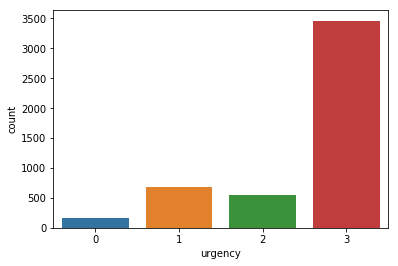

In [5]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

sns.countplot(x="urgency", data=Val_Text),
            
plt.show()

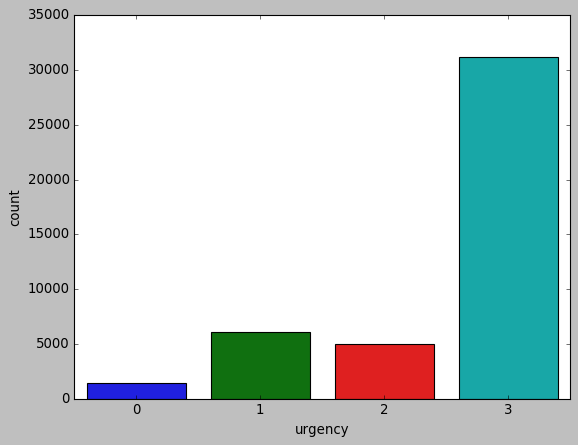

In [172]:
sns.countplot(x="urgency", data=Train_text),
            
plt.show()

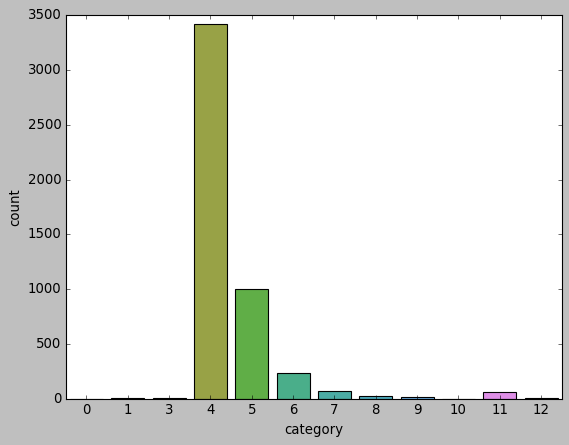

In [173]:
sns.countplot(x="category", data=Val_Text),
            
plt.show()

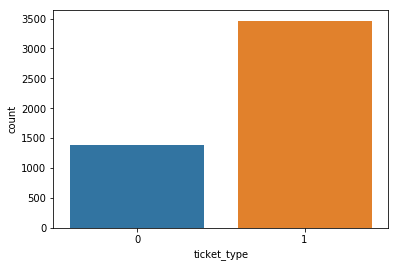

In [8]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

sns.countplot(x="ticket_type", data=Val_Text),
            
plt.show()

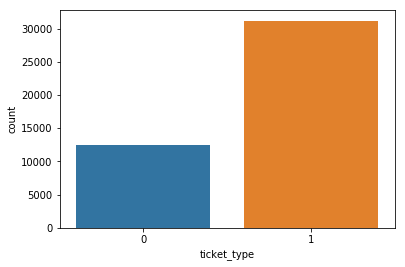

In [19]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

sns.countplot(x="ticket_type", data=Train_text),
            
plt.show()

(array([12535.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 31159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

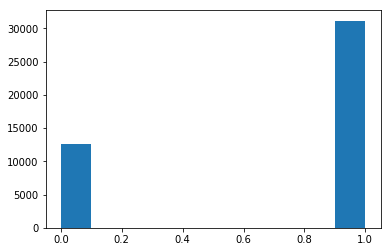

In [40]:
plt.hist(Train_text['ticket_type'])


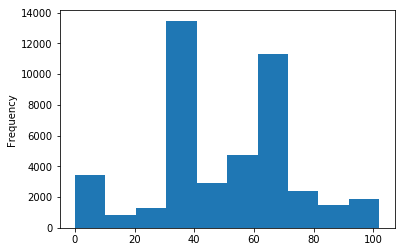

In [9]:
Train_text.business_service.plot.hist()

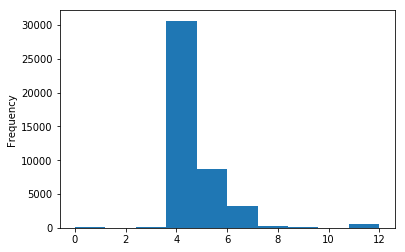

In [11]:
Train_text.category.plot.hist()

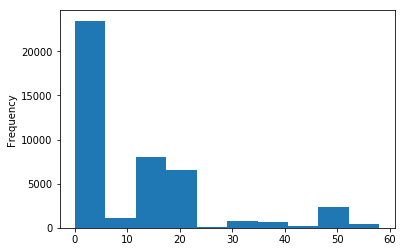

In [12]:
Train_text.sub_category1.plot.hist()

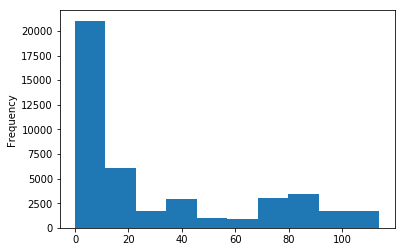

In [13]:
Train_text.sub_category2.plot.hist()

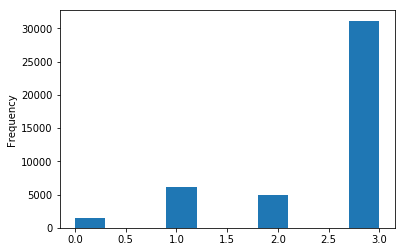

In [15]:
Train_text.urgency.plot.hist()

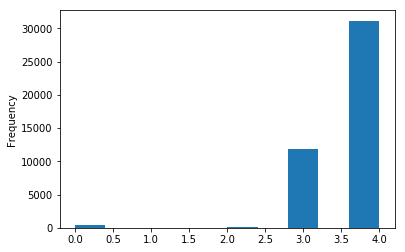

In [16]:
Train_text.impact.plot.hist()

In [10]:
Train_text.columns

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')

* Another helpful visualization tool wordcloud package helps to create word clouds by placing words on a canvas randomly, with sizes proportional to their frequency in the text.



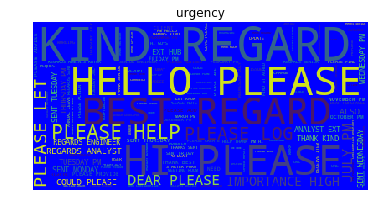

In [6]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
def cloud(text):
    wordcloud = WordCloud(background_color="blue",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("urgency")
cloud(Train_text['body'])

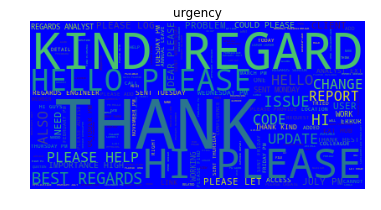

In [177]:
from wordcloud import WordCloud, STOPWORDS
stop = set(stopwords.words('english'))
def cloud(text):
    wordcloud = WordCloud(background_color="blue",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("urgency")
cloud(Val_Text['body'])

/Users/priyavivekbhandarkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


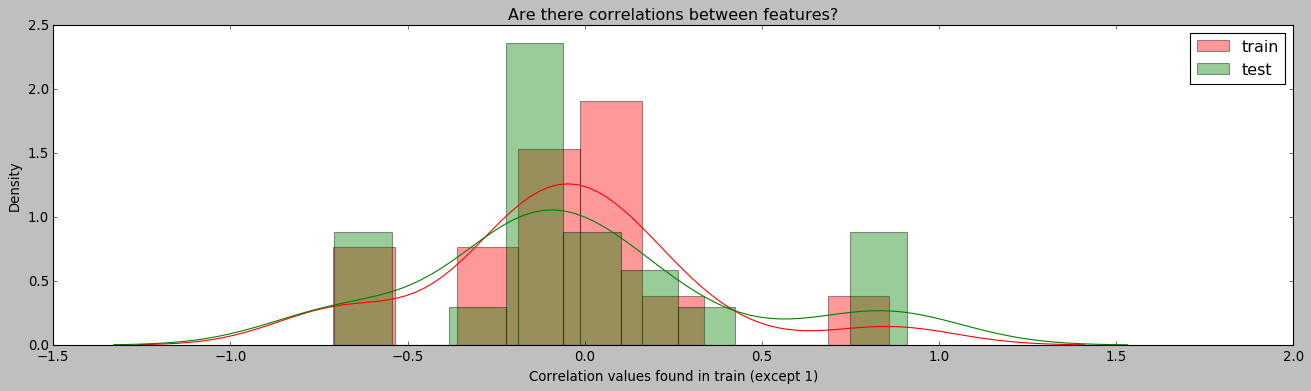

In [129]:
train_correlations = Train_text.drop(["urgency"], axis=1).corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

test_correlations = Val_Text.corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Red", label="train")
sns.distplot(test_correlations, color="Green", label="test")
plt.xlabel("Correlation values found in train (except 1)")
plt.ylabel("Density")
plt.title("Are there correlations between features?"); 
plt.legend();

/Users/priyavivekbhandarkar/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


LinAlgError: singular matrix

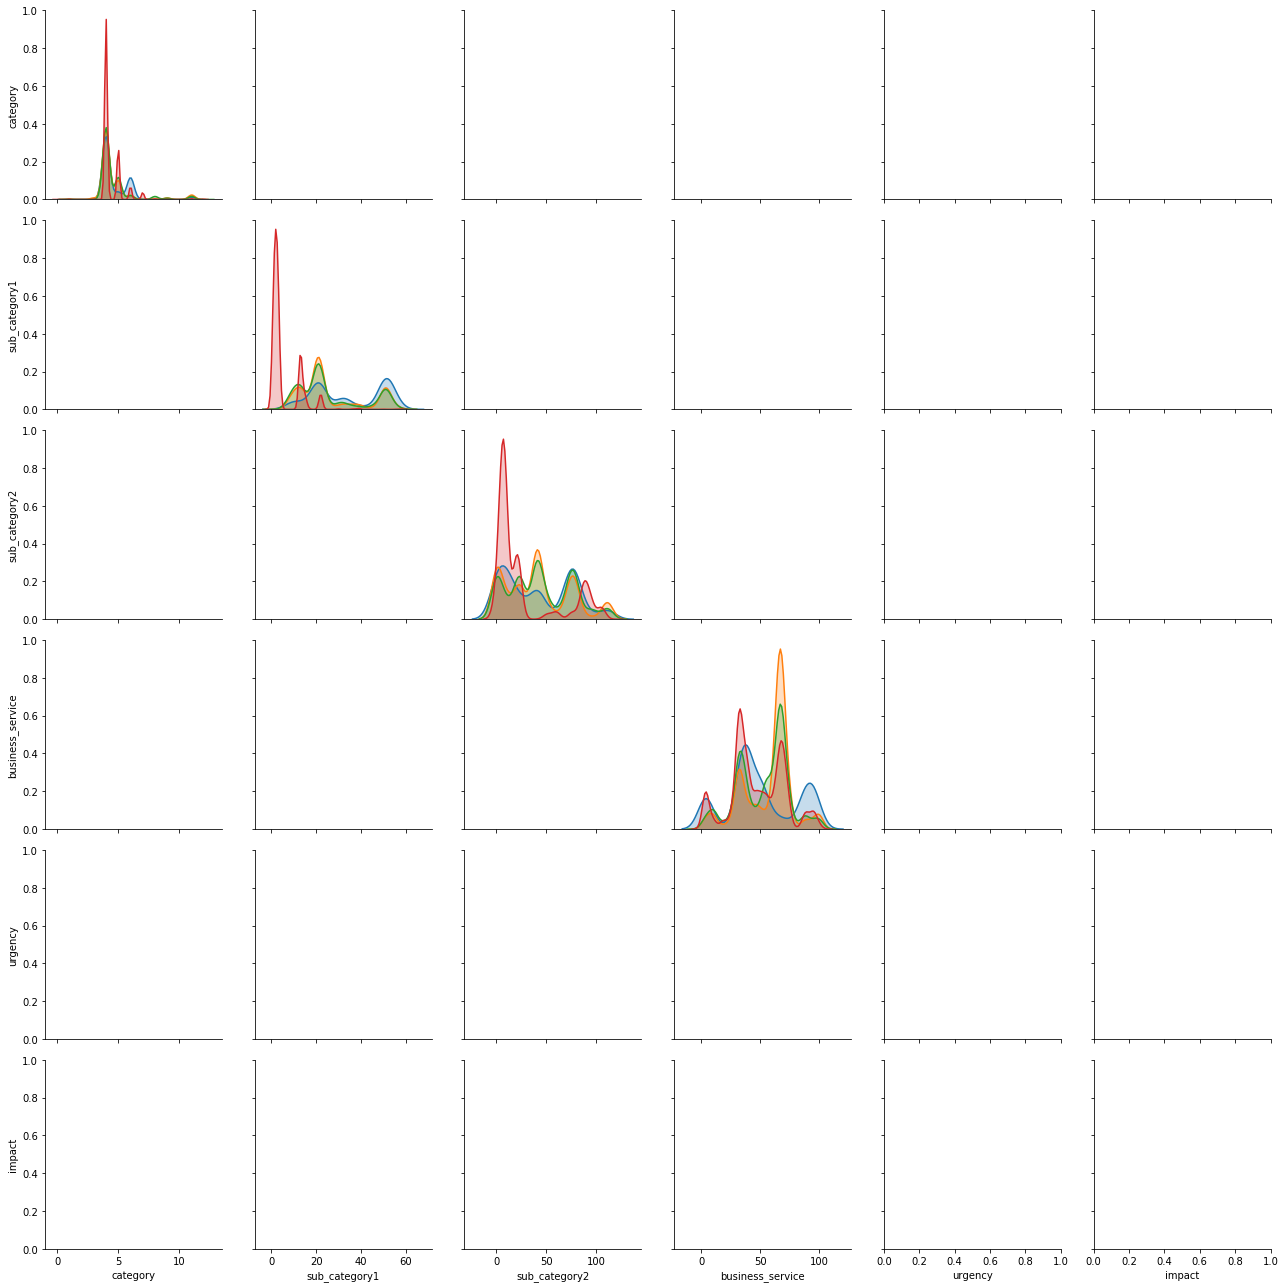

In [3]:
# Forecast columns
types_T = ['category', 'sub_category1','sub_category2', 'business_service', 'urgency', 'impact']

# Pair-wise scatter plot for the forecasts
sns.pairplot(Train_text, vars=types_T, hue='urgency', size=3)

# Show the plot
plt.show()
plt.legend();

In [100]:
types = ['ticket_type', 'category', 'sub_category1', 'sub_category2', 'business_service', 'urgency', 'impact']


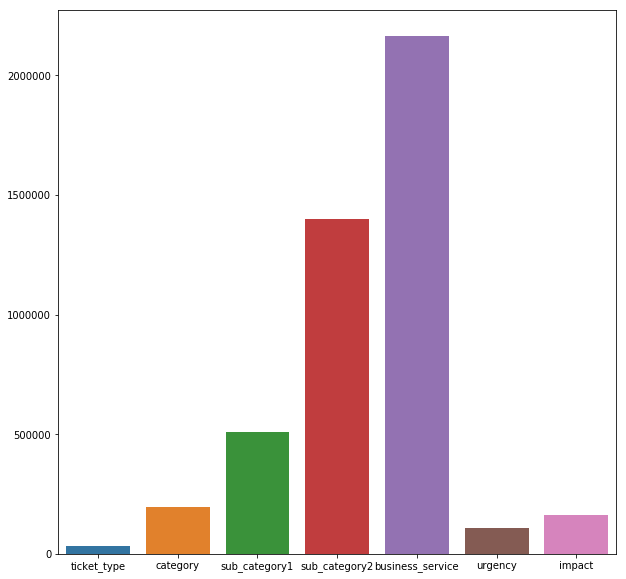

In [22]:
count_list = []
for i in types:
    count_list.append(Train_text[i].sum())
plt.figure(figsize=(10,10))  
sns.barplot(x=types, y=count_list)

It looks like highly skewed data. Most of the comments do not belong to any of these categories. So we'll do undersampling for majority class.

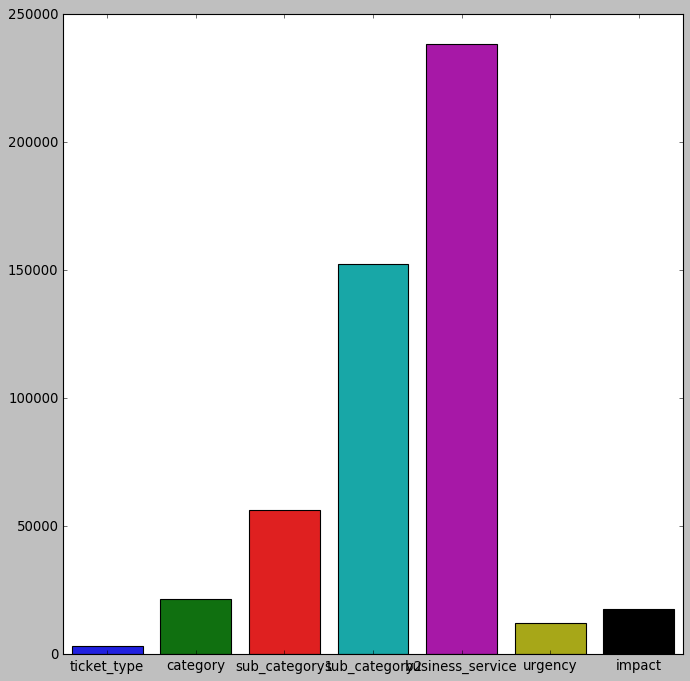

In [115]:
count_list = []
for i in types:
    count_list.append(Val_Text[i].sum())
plt.figure(figsize=(10,10))  
sns.barplot(x=types, y=count_list)

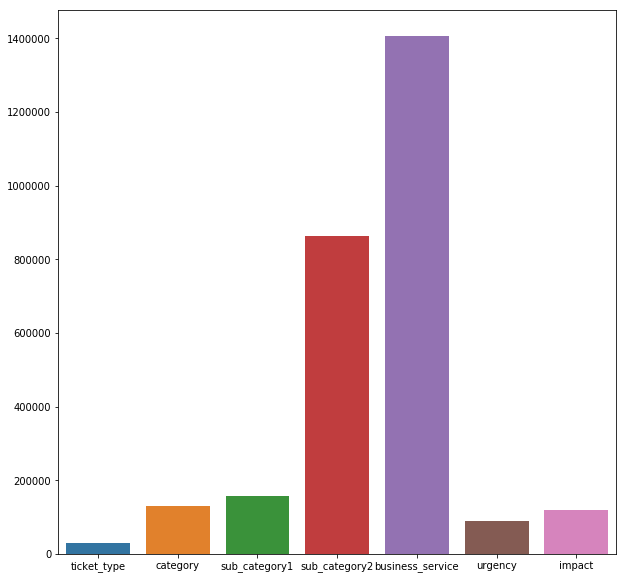

In [31]:
count_list = []
for i in types:
    count_list.append(sampled_train[i].sum())
plt.figure(figsize=(10,10))  
sns.barplot(x=types, y=count_list)

In [32]:
sampled_train.shape

(29674, 9)

# Text Cleaning

In [92]:
import string
import itertools 
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

stop_words = set(stopwords.words('english'))

def cleanData(text, lowercase = False, remove_stops = False, stemming = False, lemmatization = False):
    txt = str(text)
    
    # Replace apostrophes with standard lexicons
    txt = txt.replace("isn't", "is not")
    txt = txt.replace("aren't", "are not")
    txt = txt.replace("ain't", "am not")
    txt = txt.replace("won't", "will not")
    txt = txt.replace("didn't", "did not")
    txt = txt.replace("shan't", "shall not")
    txt = txt.replace("haven't", "have not")
    txt = txt.replace("hadn't", "had not")
    txt = txt.replace("hasn't", "has not")
    txt = txt.replace("don't", "do not")
    txt = txt.replace("wasn't", "was not")
    txt = txt.replace("weren't", "were not")
    txt = txt.replace("doesn't", "does not")
    txt = txt.replace("'s", " is")
    txt = txt.replace("'re", " are")
    txt = txt.replace("'m", " am")
    txt = txt.replace("'d", " would")
    txt = txt.replace("'ll", " will")
    txt = txt.replace("--th", " ")
    
    # More cleaning
    txt = re.sub(r"alot", "a lot", txt)
    txt = re.sub(r"what's", "", txt)
    txt = re.sub(r"What's", "", txt)
    
    # Remove urls and emails
    txt = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', txt, flags=re.MULTILINE)
    txt = re.sub(r'[\w\.-]+@[\w\.-]+', ' ', txt, flags=re.MULTILINE)
    
    # Replace words like sooooooo with so
    txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
    
    # Remove punctuation from text
    txt = ''.join([c for c in text if c not in punctuation])
    
    # Remove all symbols
    txt = re.sub(r'[^A-Za-z\s]',r' ',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stop_words])
        
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])
    
    if lemmatization:
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()])

    return txt

In [93]:
# clean body text
Train_text['body'] = Train_text['body'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=False, lemmatization = False))
Val_Text['body'] = Val_Text['body'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=False, lemmatization = False))

* Define MAX_SEQUENCE_LENGTH, MAX_NB_WORDS

In [94]:
MAX_SEQUENCE_LENGTH = 400
MAX_NB_WORDS = 1000 

# Preparing the text data

* Now need to tokenize the data into a format that can be used by the word embeddings. Keras offers a couple of convenience methods for text preprocessing and sequence preprocessing which  I can employ to prepare my text.

* Start by using the Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. You can add the parameter num_words, which is responsible for setting the size of the vocabulary. The most common num_words words will be then kept. I have prepared the testing and training data.

### Data Preprocessing
* Tokenization — convert sentences to words
* Removing unnecessary punctuation, tags
* Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic
* Stemming — words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
* Lemmatization — Another approach to remove inflection by determining the part of speech and utilizing detailed database of the language.
* Thus stemming & lemmatization help reduce words like ‘studies’, ‘studying’ to a common base form or root word ‘study’. For detailed discussion on Stemming & Lemmatization refer here . Note that not all the steps are mandatory and is based on the application use case. For Spam Filtering we may follow all the above steps but may not for language translation problem.




* Then we can format our text samples and labels into tensors that can be fed into a neural network. To do this, we will rely on Keras utilities keras.preprocessing.text.Tokenizer and keras.preprocessing.sequence.pad_sequences.
* Now we need to tokenize the data into a format that can be used by the word embeddings. 



In [95]:

tokenizer = Tokenizer(lower=False, filters='',num_words = MAX_NB_WORDS)
tokenizer.fit_on_texts(Train_text['body'])

sequences = tokenizer.texts_to_sequences(Train_text['body'])
test_sequences = tokenizer.texts_to_sequences(Val_Text['body'])

train_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of train data tensor:', train_data.shape)

test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of test data tensor:', test_data.shape)


nb_words = (np.max(train_data) + 1) 
 ## Adding 1 because of reserved 0 index

Shape of train data tensor: (43694, 400)
Shape of test data tensor: (4855, 400)


In [185]:
word_index = len(tokenizer.word_index) + 1
word_index

11822

* Index 1, it is important to note that the index 0 is reserved and is not assigned to any word.This zero index is used for padding.

* Unknown words (words that are not in the vocabulary) are denoted in Keras with word_count + 1 since they can also hold some information. You can see the index of each word by taking a look at the word_index dictionary of the Tokenizer object.

* pad_sequence() which simply pads the sequence of words with zeros. By default, it prepends zeros but we want to append them. Typically it does not matter whether you prepend or append zeros.

* Additionally  add a maxlen parameter to specify how long the sequences should be.



In [181]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11821 unique tokens.


* In the text document we have 11821 unique tokens.

In [34]:
sequences[1]

[27,
 2,
 324,
 6,
 1,
 22,
 597,
 532,
 324,
 1,
 22,
 178,
 393,
 848,
 77,
 396,
 262,
 1,
 23,
 5,
 16,
 4,
 29,
 18]

In [186]:
type(tokenizer.word_index), len(tokenizer.word_index)


(dict, 11821)

In [188]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
index_to_word

{1: 'please',
 2: 'pm',
 3: 'hi',
 4: 'regards',
 5: 'thank',
 6: 'hello',
 7: 'thanks',
 8: 'sent',
 9: 'kind',
 10: 'help',
 11: 'tuesday',
 12: 'wednesday',
 13: 'dear',
 14: 'thursday',
 15: 'friday',
 16: 'best',
 17: 'july',
 18: 'engineer',
 19: 'error',
 20: 'ext',
 21: 'issue',
 22: 'log',
 23: 'let',
 24: 'attached',
 25: 'date',
 26: 'change',
 27: 'october',
 28: 'information',
 29: 'senior',
 30: 'also',
 31: 'november',
 32: 'add',
 33: 'form',
 34: 'details',
 35: 'name',
 36: 'order',
 37: 'analyst',
 38: 'access',
 39: 'leaver',
 40: 'update',
 41: 'december',
 42: 'number',
 43: 'code',
 44: 'could',
 45: 'officer',
 46: 'site',
 47: 'provide',
 48: 'leave',
 49: 'work',
 50: 'march',
 51: 'client',
 52: 'create',
 53: 'high',
 54: 'report',
 55: 'issues',
 56: 'si',
 57: 'days',
 58: 'february',
 59: 'manager',
 60: 'working',
 61: 'cannot',
 62: 'find',
 63: 'la',
 64: 'administrator',
 65: 'card',
 66: 'assigned',
 67: 'receive',
 68: 'confluence',
 69: 'location',

In [189]:
" ".join([index_to_word[i] for i in sequences[0]])

'october pm record hello think july seems incorrect record amount st july employees sheet attached employees possible records incorrect employees record thanks'

In [99]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 29.0
max length: 743


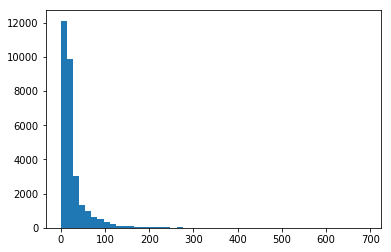

In [20]:
plt.hist(seq_lens, bins=50);

Let's zoom on the distribution of regular sized posts. The vast majority of the posts have less than 150 symbols:



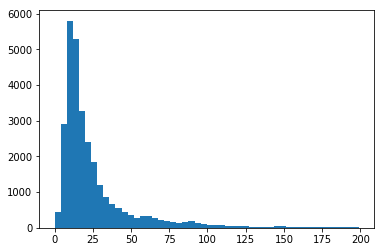

In [21]:
plt.hist([l for l in seq_lens if l < 200], bins=50);


In [140]:
labels = to_categorical(np.asarray(Train_text['urgency']))
print('Shape of train data tensor:', train_data.shape)
print('Shape of train label tensor:', labels.shape)

Shape of data tensor: (43694, 400)
Shape of label tensor: (43694, 4)


In [145]:
labels_val= to_categorical(np.asarray(Val_Text['urgency']))
print('Shape of test data tensor:', test_data.shape)
print('Shape of test label tensor:', labels_val.shape)

Shape of test data tensor: (4855, 400)
Shape of test label tensor: (4855, 4)


### Urgency column converted from integer to categorical column

In [103]:

y_train = utils.to_categorical(Train_text['urgency'])
y_train

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [104]:
y_test = utils.to_categorical(Val_Text['urgency'])

In [105]:
y_test

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

# Model

# (1) Baseline Model

 * contribution of the entire sequence seems important to your result, then average pooling sounds reasonable.

In [106]:
model1 = Sequential()
model1.add(Embedding(nb_words,50,input_length=MAX_SEQUENCE_LENGTH))
# model.add(SpatialDropout1D(0.2))
# model.add(Bidirectional(GRU(20, return_sequences=True)))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(4, activation='softmax'))
model1.summary()
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 400, 50)           50000     
_________________________________________________________________
global_average_pooling1d_7 ( (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 204       
Total params: 50,204
Trainable params: 50,204
Non-trainable params: 0
_________________________________________________________________


In [107]:
history = model1.fit(train_data, y_train, validation_split=0.2, nb_epoch=30, batch_size=32)

/Users/priyavivekbhandarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 34955 samples, validate on 8739 samples
Epoch 1/30
34955/34955 [==============================] - 34s 964us/step - loss: 0.8371 - acc: 0.7147 - val_loss: 0.7455 - val_acc: 0.7090
Epoch 2/30
34955/34955 [==============================] - 34s 978us/step - loss: 0.6111 - acc: 0.7511 - val_loss: 0.5333 - val_acc: 0.7701
Epoch 3/30
34955/34955 [==============================] - 42s 1ms/step - loss: 0.4649 - acc: 0.8045 - val_loss: 0.4394 - val_acc: 0.8082
Epoch 4/30
34955/34955 [==============================] - 35s 1ms/step - loss: 0.3997 - acc: 0.8247 - val_loss: 0.3962 - val_acc: 0.8270
Epoch 5/30
34955/34955 [==============================] - 38s 1ms/step - loss: 0.3658 - acc: 0.8362 - val_loss: 0.3699 - val_acc: 0.8303
Epoch 6/30
34955/34955 [==============================] - 39s 1ms/step - loss: 0.3446 - acc: 0.8429 - val_loss: 0.3539 - val_acc: 0.8341
Epoch 7/30
34955/34955 [==============================] - 35s 1ms/step - loss: 0.3295 - acc: 0.8495 - val_loss: 0.3472 - val_

In [110]:
# predicting the model
pred1 = model1.predict(test_data)
pred1[:10]

array([[3.8585695e-14, 7.4531982e-13, 2.5044747e-12, 1.0000000e+00],
       [8.1339115e-03, 5.8936220e-01, 4.0250388e-01, 0.0000000e+00],
       [3.1502097e-14, 6.0701997e-13, 1.0466862e-12, 1.0000000e+00],
       [1.8591542e-10, 2.2547626e-09, 3.0137779e-09, 1.0000000e+00],
       [9.5003635e-02, 5.0052053e-01, 3.6173430e-01, 4.2741507e-02],
       [1.8371955e-05, 1.1510112e-04, 4.3780197e-04, 9.9942869e-01],
       [8.1086040e-02, 4.8369873e-01, 4.3516305e-01, 5.2242369e-05],
       [3.6171617e-08, 1.3172723e-07, 1.9048574e-07, 9.9999964e-01],
       [1.0070985e-07, 6.2406792e-07, 5.0196411e-07, 9.9999881e-01],
       [1.4890414e-02, 6.5025884e-01, 3.3485085e-01, 2.9544780e-14]],
      dtype=float32)

In [230]:
predn= model1.predict_classes(test_data)

In [231]:
predn

array([3, 1, 3, ..., 3, 3, 3])

In [111]:
# Evaluating the model

score = model1.evaluate(test_data, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.29496501608071685
Test accuracy: 0.8720906283165473


In [112]:
print(model1.metrics_names)
print(score)

['loss', 'acc']
[0.29496501608071685, 0.8720906283165473]


In [229]:
y_max = np.argmax(pred1, axis=1)
y_max[:50]

array([3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 0, 1, 3,
       3, 2, 3, 2, 3, 3])

#### visualizing losses and accuracy

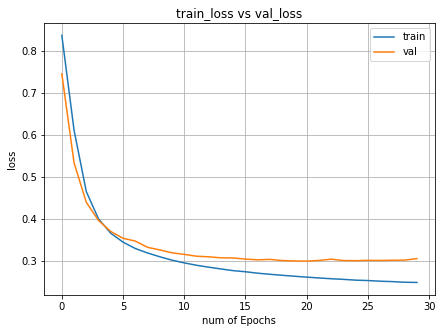

In [118]:
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

num_epoch = 30


train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']

xc=range(num_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

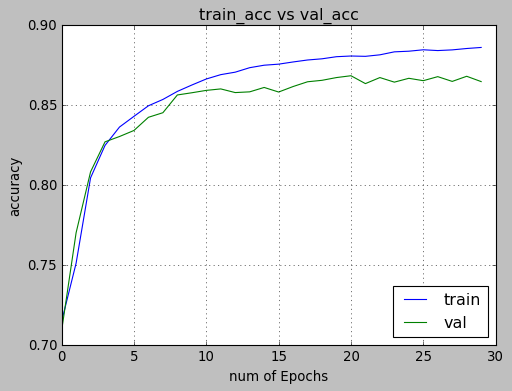

In [119]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

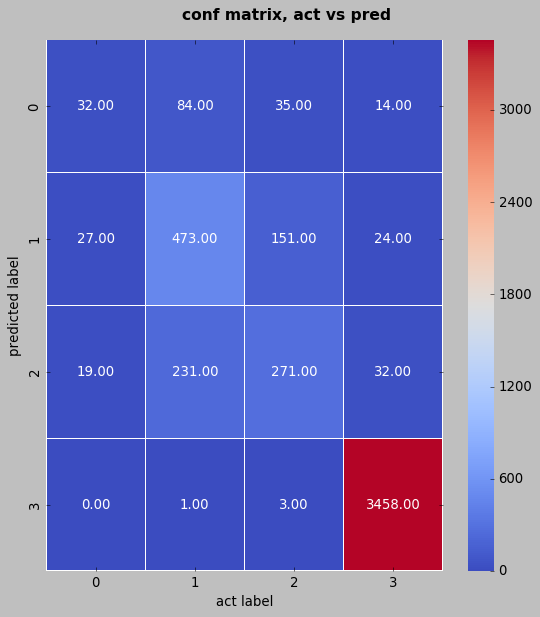

In [242]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import matplotlib
mat = confusion_matrix(Val_Text.urgency, predn)
fig, ax = plt.subplots(1,1, figsize=(8, 8))
sns.heatmap(pd.DataFrame(mat),
            ax = ax,
            cmap = 'coolwarm',
            annot = True,
            fmt = '.2f',
            linewidths = 0.05)
fig.subplots_adjust(top = 0.93)
fig.suptitle("conf matrix, act vs pred",
             fontsize=14,
             fontweight='bold')
            
        
plt.xlabel('act label')
plt.ylabel('predicted label')
# Save confusion matrix to outputs in Workbench
# plt.savefig(os.path.join('.', 'outputs', 'confusion_matrix.png'))
plt.show()

<p style="font-size:1em; color:blue; ">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

## (2) 1D convnet using Dropout

* A simple and powerful regularization technique for neural networks and deep learning models is dropout.
* Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.
* Dropout can be applied to input neurons called the visible layer.
* In below we add a new Dropout layer between the input (or visible layer) and hidden layer. The dropout rate is set to 20%, meaning one in 200 inputs will be randomly excluded from each update cycle.

* Additionally, as recommended in the original paper on Dropout, a constraint is imposed on the weights for each hidden layer, ensuring that the maximum norm of the weights does not exceed a value of 3. This is done by setting the kernel_constraint argument on the Dense class when constructing the layers.

* Dropout can be applied to hidden neurons in the body of your network model.
    * Dropout is applied between the two hidden layers and between the last hidden layer and the output layer. Again a dropout rate of 20% is used as is a weight constraint on those layers.

    * using a small dropout value of 20%-50% of neurons with 20% providing a good starting point. A probability too low has minimal effect and a value too high results in under-learning by the network.

In [121]:
from keras.layers import Flatten
model2= Sequential()
model2.add(Embedding(nb_words,50,input_length=MAX_SEQUENCE_LENGTH))
model2.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.25))
model2.add(GRU(128,return_sequences=True))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 400, 50)           50000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 400, 64)           9664      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 200, 64)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 64)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 200, 128)          74112     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
__________

In [123]:
history2 = model2.fit(train_data, y_train, validation_split=0.2, nb_epoch=5, batch_size=32)

/Users/priyavivekbhandarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 34955 samples, validate on 8739 samples
Epoch 1/5
34955/34955 [==============================] - 1094s 31ms/step - loss: 0.3254 - acc: 0.8450 - val_loss: 0.3237 - val_acc: 0.8412
Epoch 2/5
34955/34955 [==============================] - 1181s 34ms/step - loss: 0.3070 - acc: 0.8486 - val_loss: 0.3335 - val_acc: 0.8455
Epoch 3/5
34955/34955 [==============================] - 1160s 33ms/step - loss: 0.2938 - acc: 0.8520 - val_loss: 0.3107 - val_acc: 0.8498
Epoch 4/5
34955/34955 [==============================] - 1128s 32ms/step - loss: 0.2755 - acc: 0.8601 - val_loss: 0.3109 - val_acc: 0.8581
Epoch 5/5
34955/34955 [==============================] - 1158s 33ms/step - loss: 0.2649 - acc: 0.8675 - val_loss: 0.3066 - val_acc: 0.8558


In [136]:
pred2 = model2.predict(test_data)
pred2[:10]

array([[6.38791692e-30, 3.26117051e-24, 1.01927626e-22, 1.00000000e+00],
       [1.90471523e-02, 5.97501397e-01, 3.83451492e-01, 1.87685603e-10],
       [4.58101820e-26, 3.21885491e-22, 7.42984774e-21, 1.00000000e+00],
       [1.15291852e-21, 4.99732999e-19, 9.93341242e-19, 1.00000000e+00],
       [5.30453101e-02, 5.36694050e-01, 4.10259277e-01, 1.33252490e-06],
       [4.59477530e-18, 2.06084183e-14, 1.31081113e-13, 1.00000000e+00],
       [2.06199005e-01, 5.20957351e-01, 2.72841334e-01, 2.36702999e-06],
       [5.90307270e-18, 2.20327960e-16, 2.23007745e-15, 1.00000000e+00],
       [1.22948156e-15, 1.84894807e-14, 1.13234373e-13, 1.00000000e+00],
       [2.24278551e-02, 5.70631921e-01, 4.06940073e-01, 1.19506026e-07]],
      dtype=float32)

In [137]:
# Evaluating the model
score2 = model2.evaluate(test_data, y_test, verbose=0)
print('Test Loss:', score2[0])
print('Test accuracy:', score2[1])



Test Loss: 0.29556967795938716
Test accuracy: 0.8589083418296123


In [146]:
print(model2.metrics_names)
print(score2)


['loss', 'acc']
[0.29556967795938716, 0.8589083418296123]


In [243]:
pred2n= model2.predict_classes(test_data)
print(pred2n)

[3 1 3 ... 3 3 3]


In [147]:
y_max2 = np.argmax(pred2, axis=1)
y_max2[:20]



array([3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3])

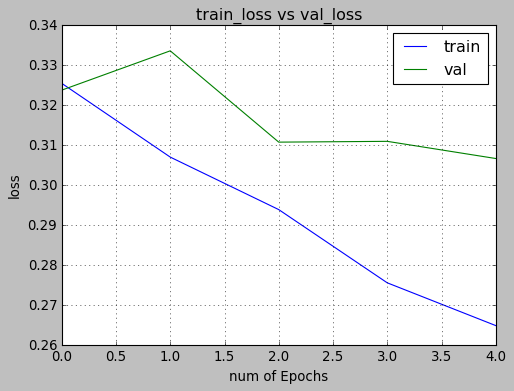

In [148]:
num_epoch = 5
# visualizing losses and accuracy
train_loss=history2.history['loss']
val_loss=history2.history['val_loss']
train_acc=history2.history['acc']
val_acc=history2.history['val_acc']

xc=range(num_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])




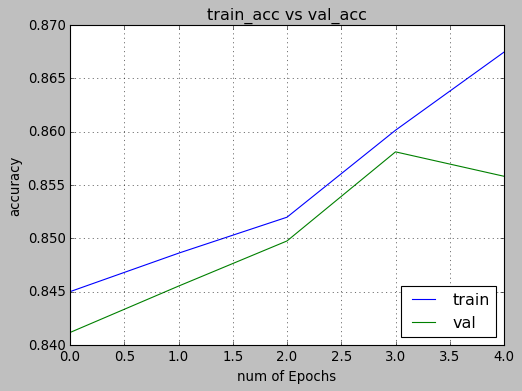

In [149]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])



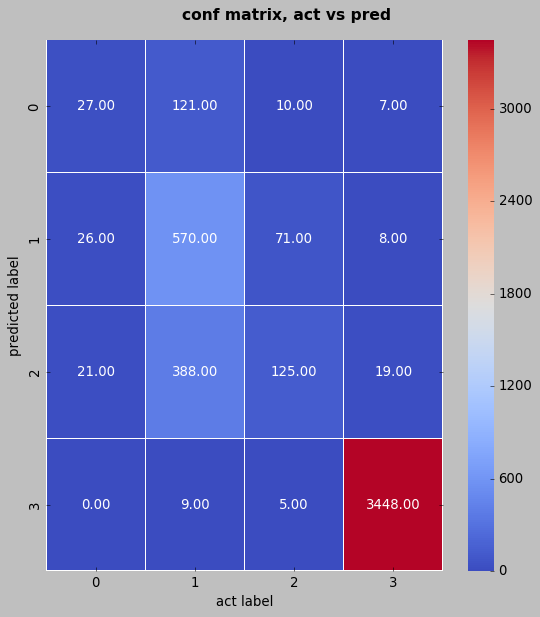

In [244]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import matplotlib
mat2 = confusion_matrix(Val_Text.urgency, pred2n)
fig, ax = plt.subplots(1,1, figsize=(8, 8))
sns.heatmap(pd.DataFrame(mat2),
            ax = ax,
            cmap = 'coolwarm',
            annot = True,
            fmt = '.2f',
            linewidths = 0.05)
fig.subplots_adjust(top = 0.93)
fig.suptitle("conf matrix, act vs pred",
             fontsize=14,
             fontweight='bold')
            
        
plt.xlabel('act label')
plt.ylabel('predicted label')
# Save confusion matrix to outputs in Workbench
# plt.savefig(os.path.join('.', 'outputs', 'confusion_matrix.png'))
plt.show()

<p style="font-size:1em; color:blue; ">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

---
### Preparing the Embedding layer
* Next, we compute an index mapping words to known embeddings, by parsing the data dump of pre-trained embeddings:

* At this point we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix:

In [131]:
EMBEDDING_DIM = 100
embeddings_index = {}
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

### Keras Embedding Layer
* Keras offers an Embedding layer that can be used for neural networks on text data.
* It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.

* The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

* It is a flexible layer that can be used in a variety of ways, such as:

    * It can be used alone to learn a word embedding that can be saved and used in another model later.
    * It can be used as part of a deep learning model where the embedding is learned along with the model itself.
    * It can be used to load a pre-trained word embedding model, a type of transfer learning.

* The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

#### It must specify 3 arguments:

###### input_dim: 
This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
###### output_dim: 
This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
#####  input_length:
This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

In [132]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH)

* An Embedding layer should be fed sequences of integers, i.e. a 2D input of shape (samples, indices). These input sequences should be padded so that they all have the same length in a batch of input data (although an Embedding layer is capable of processing sequence of heterogenous length, if you don't pass an explicit input_length argument to the layer).

* All that the Embedding layer does is to map the integer inputs to the vectors found at the corresponding index in the embedding matrix, i.e. the sequence [1, 2] would be converted to [embeddings[1], embeddings[2]]. This means that the output of the Embedding layer will be a 3D tensor of shape (samples, sequence_length, embedding_dim).
---

# (3) 1D convnet
* Build a small 1D convnet to solve our classification problem

In [133]:
#from keras.optimizers import Adam
adam = Adam(lr=0.001)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)  # global max pooling
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(4, activation='softmax')(x)

model3 = Model(sequence_input, preds)
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])



In [134]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 400)               0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 400, 100)          1182200   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 396, 128)          64128     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 79, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 75, 128)           82048     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 15, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 11, 128)           82048     
__________

In [135]:
history3 = model3.fit(train_data, y_train, validation_split=0.2, nb_epoch=3, batch_size=128)

/Users/priyavivekbhandarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 34955 samples, validate on 8739 samples
Epoch 1/3
34955/34955 [==============================] - 333s 10ms/step - loss: 0.7791 - acc: 0.7383 - val_loss: 0.7251 - val_acc: 0.7564
Epoch 2/3
34955/34955 [==============================] - 3444s 99ms/step - loss: 0.6875 - acc: 0.7683 - val_loss: 0.7038 - val_acc: 0.7590
Epoch 3/3
34955/34955 [==============================] - 341s 10ms/step - loss: 0.6808 - acc: 0.7709 - val_loss: 0.7120 - val_acc: 0.7602


In [150]:
pred3 = model3.predict(test_data)
pred3[:10]

array([[2.0311780e-12, 2.0182556e-09, 2.5043125e-08, 1.0000000e+00],
       [3.8332716e-02, 6.5954363e-01, 3.0208349e-01, 4.0215673e-05],
       [2.0383319e-02, 9.6456930e-02, 8.3928540e-02, 7.9923123e-01],
       [2.0383319e-02, 9.6456930e-02, 8.3928540e-02, 7.9923123e-01],
       [2.0383319e-02, 9.6456930e-02, 8.3928540e-02, 7.9923123e-01],
       [2.0383319e-02, 9.6456930e-02, 8.3928540e-02, 7.9923123e-01],
       [2.0383319e-02, 9.6456930e-02, 8.3928540e-02, 7.9923123e-01],
       [2.0383319e-02, 9.6456930e-02, 8.3928540e-02, 7.9923123e-01],
       [2.0383319e-02, 9.6456930e-02, 8.3928540e-02, 7.9923123e-01],
       [1.2593277e-01, 4.8191905e-01, 3.9115080e-01, 9.9729071e-04]],
      dtype=float32)

In [151]:
# Evaluating the model
score3 = model3.evaluate(test_data, y_test, verbose=0)
print('Test Loss:', score3[0])
print('Test accuracy:', score3[1])


Test Loss: 0.7103344975183233
Test accuracy: 0.7668383109336288


In [152]:
print(model3.metrics_names)
print(score3)



['loss', 'acc']
[0.7103344975183233, 0.7668383109336288]


In [253]:
pred3n= model3.predict_on_batch(test_data)
print(pred3n)

[[2.0311780e-12 2.0182556e-09 2.5043125e-08 1.0000000e+00]
 [3.8332716e-02 6.5954363e-01 3.0208349e-01 4.0215673e-05]
 [2.0383319e-02 9.6456930e-02 8.3928540e-02 7.9923123e-01]
 ...
 [1.2794678e-16 1.0456930e-11 5.9820260e-11 1.0000000e+00]
 [1.6361388e-17 3.8229177e-13 1.1694464e-11 1.0000000e+00]
 [2.0383319e-02 9.6456930e-02 8.3928540e-02 7.9923123e-01]]


In [153]:
y_max3 = np.argmax(pred3, axis=1)
y_max3[:20]


array([3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3])

In [220]:
y_max3 = np.argmax(pred3)
y_max3



3

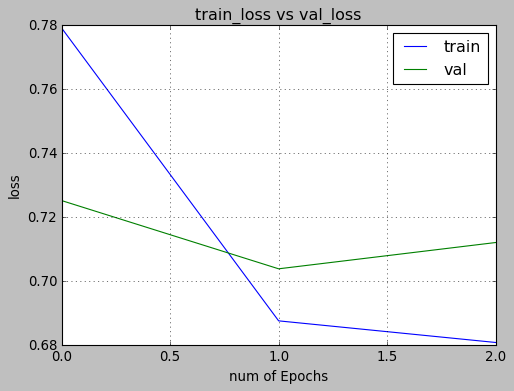

In [154]:
num_epoch = 3
# visualizing losses and accuracy
train_loss=history3.history['loss']
val_loss=history3.history['val_loss']
train_acc=history3.history['acc']
val_acc=history3.history['val_acc']


xc=range(num_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


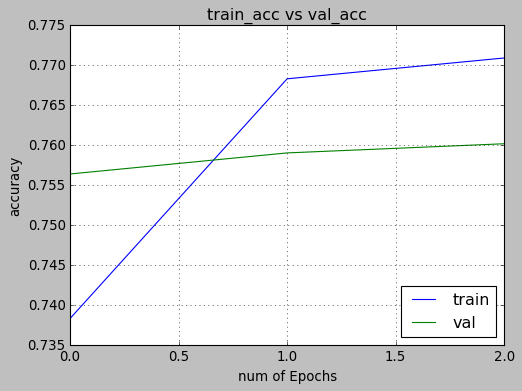

In [155]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


<p style="font-size:1em; color:blue; ">//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

# (4) LSTM 

* A sequential model which is a linear stack of layers is used. LSTM layer with 40,30,20,10 memory units and it returns sequences. This is done to ensure that the next LSTM layer receives sequences and not just randomly scattered data. 
* An embedding layer which represents each unique token as a vector. 
* Finally, we have the last layer as a fully connected layer with a ‘softmax’ activation and neurons equal to the number of unique characters, because we need to output one hot encoded result.

In [156]:
model4 = Sequential() # Call Sequential to initialize a network
model4.add(Embedding(input_dim = nb_words, 
                    input_length = MAX_SEQUENCE_LENGTH, 
                    output_dim = EMBEDDING_DIM))
# Add an embedding layer which represents each unique token as a vector
model4.add(LSTM(40, return_sequences=True)) # Add an LSTM layer
model4.add(LSTM(30, return_sequences=True)) # Add an LSTM layer
model4.add(LSTM(20, return_sequences=True))
# Add an LSTM layer
model4.add(LSTM(10, return_sequences=False))
model4.add(Dense(4, activation='softmax'))

In [157]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 400, 100)          100000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 400, 40)           22560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 400, 30)           8520      
_________________________________________________________________
lstm_3 (LSTM)                (None, 400, 20)           4080      
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 44        
Total params: 136,444
Trainable params: 136,444
Non-trainable params: 0
_________________________________________________________________


In [159]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)
model4.compile(optimizer=adam,                  # 'Adam' is a variant of gradient descent technique
              loss='categorical_crossentropy', # categorical_crossentropy for multi-class classification
              metrics=['accuracy'])            # These metrics are computed for evaluating and stored in history


history4 = model4.fit(train_data, y_train, validation_split=0.2, nb_epoch=5, batch_size=64)

/Users/priyavivekbhandarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34955 samples, validate on 8739 samples
Epoch 1/5
34955/34955 [==============================] - 2994s 86ms/step - loss: 0.5554 - acc: 0.7983 - val_loss: 0.3476 - val_acc: 0.8383
Epoch 2/5
34955/34955 [==============================] - 3066s 88ms/step - loss: 0.3210 - acc: 0.8462 - val_loss: 0.3314 - val_acc: 0.8417
Epoch 3/5
34955/34955 [==============================] - 3002s 86ms/step - loss: 0.3098 - acc: 0.8479 - val_loss: 0.3230 - val_acc: 0.8407
Epoch 4/5
34955/34955 [==============================] - 3057s 87ms/step - loss: 0.3015 - acc: 0.8489 - val_loss: 0.3225 - val_acc: 0.8412
Epoch 5/5
34955/34955 [==============================] - 3004s 86ms/step - loss: 0.2988 - acc: 0.8502 - val_loss: 0.3225 - val_acc: 0.8415


In [162]:
pred4 = model4.predict(test_data)
pred4[:10]

array([[2.12599625e-04, 1.94805514e-04, 3.29865346e-04, 9.99262750e-01],
       [1.18315354e-01, 5.37128866e-01, 3.42462569e-01, 2.09326111e-03],
       [2.13943043e-04, 1.95890170e-04, 3.32028925e-04, 9.99258101e-01],
       [2.14384330e-04, 2.02437586e-04, 3.37881560e-04, 9.99245286e-01],
       [1.06270254e-01, 4.49871302e-01, 4.41709459e-01, 2.14906782e-03],
       [2.15621287e-04, 2.01451097e-04, 3.37948964e-04, 9.99245048e-01],
       [1.14970900e-01, 5.16843677e-01, 3.66057456e-01, 2.12789746e-03],
       [2.34032996e-04, 2.90593161e-04, 4.24936472e-04, 9.99050438e-01],
       [2.46964191e-04, 3.46690998e-04, 4.77126305e-04, 9.98929203e-01],
       [1.18116699e-01, 5.37441969e-01, 3.42350543e-01, 2.09073722e-03]],
      dtype=float32)

In [247]:
pred4n= model4.predict_classes(test_data)
print(pred4n)

[3 1 3 ... 3 3 3]


In [164]:
score4 = model4.evaluate(test_data, y_test, verbose=0)
print('Test Loss:', score4[0])
print('Test accuracy:', score4[1])


Test Loss: 0.3090007642331993
Test accuracy: 0.8506694128903743


In [165]:
print(model4.metrics_names)
print(score4)

['loss', 'acc']
[0.3090007642331993, 0.8506694128903743]


In [166]:
y_max4 = np.argmax(pred4, axis=1)
y_max4[:20]


array([3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3])

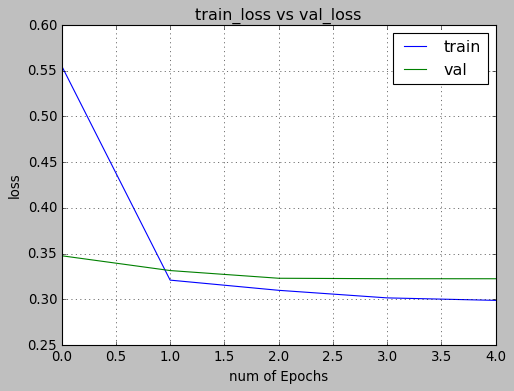

In [167]:
num_epoch = 5

# visualizing losses and accuracy
train_loss=history4.history['loss']
val_loss=history4.history['val_loss']
train_acc=history4.history['acc']
val_acc=history4.history['val_acc']

xc=range(num_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


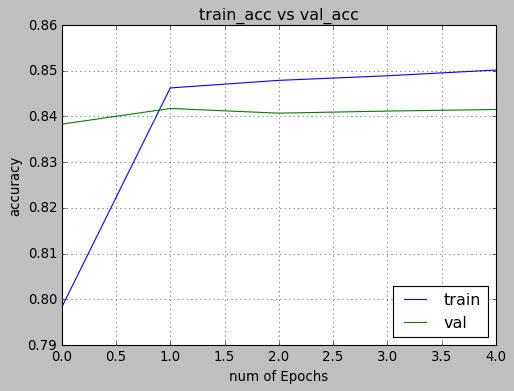

In [168]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])



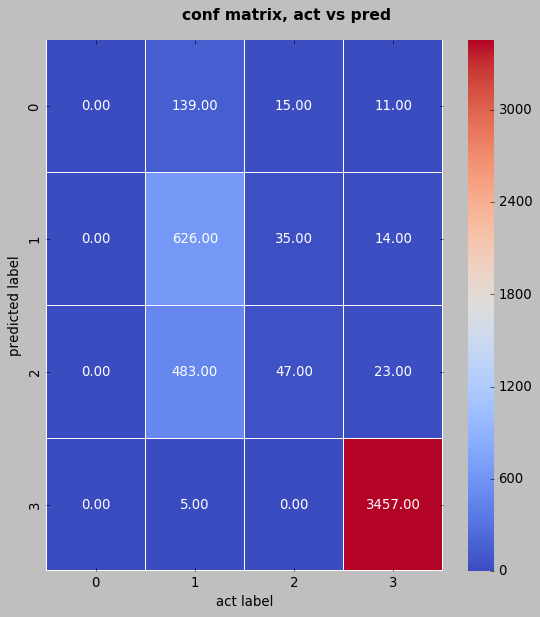

In [248]:
mat4 = confusion_matrix(Val_Text.urgency, pred4n)
fig, ax = plt.subplots(1,1, figsize=(8, 8))
sns.heatmap(pd.DataFrame(mat4),
            ax = ax,
            cmap = 'coolwarm',
            annot = True,
            fmt = '.2f',
            linewidths = 0.05)
fig.subplots_adjust(top = 0.93)
fig.suptitle("conf matrix, act vs pred",
             fontsize=14,
             fontweight='bold')
            
        
plt.xlabel('act label')
plt.ylabel('predicted label')
# Save confusion matrix to outputs in Workbench
# plt.savefig(os.path.join('.', 'outputs', 'confusion_matrix.png'))
plt.show()

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

# (5) Simple RNN

In [190]:
model5 = Sequential() # Call Sequential to initialize a network
model5.add(Embedding(input_dim = nb_words, 
                    input_length = MAX_SEQUENCE_LENGTH, 
                    output_dim = EMBEDDING_DIM)) # Add an embedding layer which represents each unique token as a vector
model5.add(SimpleRNN(40, return_sequences=True))
model5.add(SimpleRNN(40, return_sequences=True)) 
model5.add(SimpleRNN(40, return_sequences=True)) 
model5.add(SimpleRNN(25, return_sequences=False))
model5.add(Dense(4, activation='softmax')) # Add an ouput layer. Since classification, 3 nodes for 3 classes.

In [191]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 400, 100)          100000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 400, 40)           5640      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 400, 40)           3240      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 400, 40)           3240      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 25)                1650      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 104       
Total params: 113,874
Trainable params: 113,874
Non-trainable params: 0
_________________________________________________________________


In [192]:
model5.compile(optimizer=adam,                  # 'Adam' is a variant of gradient descent technique
              loss='categorical_crossentropy', # categorical_crossentropy for multi-class classification
              metrics=['accuracy'])            # These metrics are computed for evaluating and stored in history


history5 = model5.fit(train_data, y_train, batch_size=256, validation_split=0.2, nb_epoch=2)

/Users/priyavivekbhandarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34955 samples, validate on 8739 samples
Epoch 1/2
34955/34955 [==============================] - 394s 11ms/step - loss: 0.8550 - acc: 0.7152 - val_loss: 0.7143 - val_acc: 0.7432
Epoch 2/2
34955/34955 [==============================] - 360s 10ms/step - loss: 0.4945 - acc: 0.8073 - val_loss: 0.6742 - val_acc: 0.7834


In [249]:
pred5n= model5.predict_classes(test_data)
print(pred5n)

[3 1 3 ... 3 3 3]


In [193]:
pred5 = model5.predict(test_data)
pred5[:10]

array([[0.03135782, 0.01601855, 0.07435872, 0.87826496],
       [0.12648349, 0.46456292, 0.38838175, 0.02057187],
       [0.03063609, 0.01576628, 0.07120384, 0.8823938 ],
       [0.02988562, 0.01514887, 0.06710035, 0.8878652 ],
       [0.13347849, 0.44248325, 0.39382058, 0.03021774],
       [0.03332678, 0.01609801, 0.09022235, 0.8603529 ],
       [0.22412735, 0.46451414, 0.28481838, 0.02654021],
       [0.03113611, 0.01570914, 0.07352386, 0.8796309 ],
       [0.0313838 , 0.01556576, 0.07701249, 0.8760379 ],
       [0.12749231, 0.47162548, 0.38138098, 0.01950119]], dtype=float32)

In [194]:
# Evaluating the model
score5 = model5.evaluate(test_data, y_test, verbose=0)
print('Test Loss:', score5[0])
print('Test accuracy:', score5[1])



Test Loss: 0.6375731560216505
Test accuracy: 0.7911431513043805


In [196]:
print(model5.metrics_names)
print(score5)



['loss', 'acc']
[0.6375731560216505, 0.7911431513043805]


In [197]:
y_max5 = np.argmax(pred5, axis=1)
y_max5[:20]



array([3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

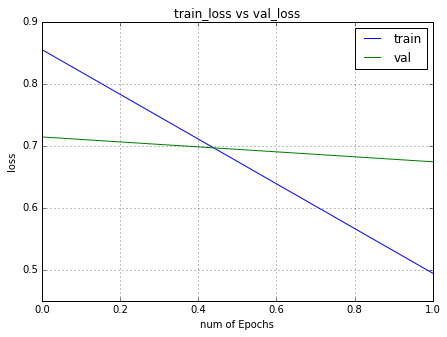

In [216]:
num_epoch = 2
# visualizing losses and accuracy
train_loss=history5.history['loss']
val_loss=history5.history['val_loss']
train_acc=history5.history['acc']
val_acc=history5.history['val_acc']

xc=range(num_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

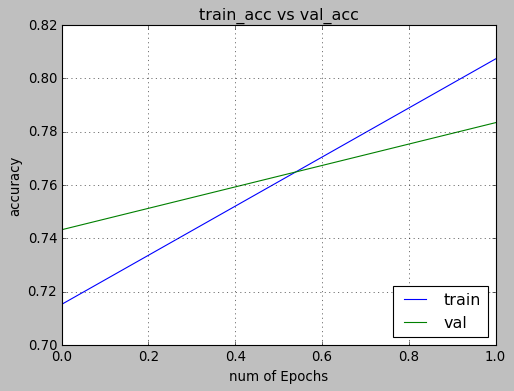

In [217]:


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


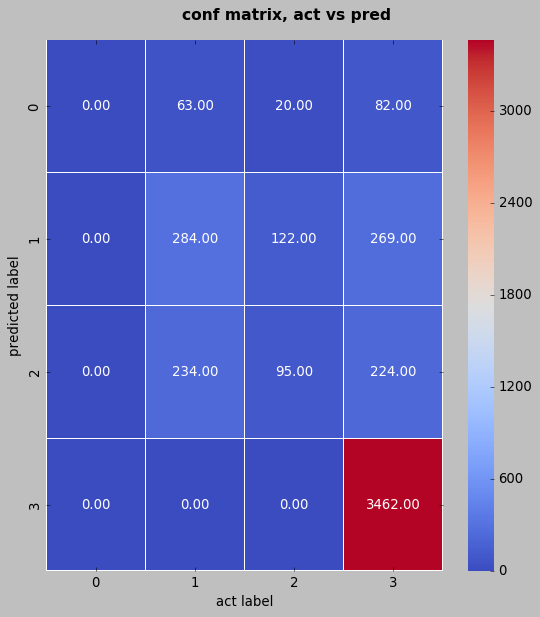

In [250]:
mat5 = confusion_matrix(Val_Text.urgency, pred5n)
fig, ax = plt.subplots(1,1, figsize=(8, 8))
sns.heatmap(pd.DataFrame(mat5),
            ax = ax,
            cmap = 'coolwarm',
            annot = True,
            fmt = '.2f',
            linewidths = 0.05)
fig.subplots_adjust(top = 0.93)
fig.suptitle("conf matrix, act vs pred",
             fontsize=14,
             fontweight='bold')
            
        
plt.xlabel('act label')
plt.ylabel('predicted label')
# Save confusion matrix to outputs in Workbench
# plt.savefig(os.path.join('.', 'outputs', 'confusion_matrix.png'))
plt.show()

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

In [59]:
# compute average length of title_char, title_word, desc_char, desc_word
dict_length_columns={'title':0,'body':0}
num_examples=len(Train_text)
Train_text_small=Train_text.sample(frac=0.01)
for index, row in Train_text_small.iterrows():
    #title_length=len(row['title'].split(","))
    body_length=len(row['body'].split(","))
    dict_length_columns['title']=dict_length_columns['title']+title_length
    dict_length_columns['body']=dict_length_columns['body']+body_length
dict_length_columns={k:float(v)/float(num_examples*0.01) for k,v in dict_length_columns.items()}
print("dict_length_columns:",dict_length_columns)


dict_length_columns: {'title': 1.000137318624983, 'body': 1.000137318624983}


In [205]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons, dropout_rate=dropout_rate, weight_constraint=weight_constraint, activation=activation, batch_size=batch_size, epochs=epochs, optimizer=optimizer, learn_rate=learn_rate, momentum=momentum, init_mode=init_mode)
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1, scoring='accuracy')


In [212]:
grid_result = grid_search.fit()

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

# Training and evaluation results For Text Classification

* In order to train our models, we used Deep learning model to run training jobs with different parameters and then compare the results and pick up the one with the best values.:

* To train models we tested 5 different algorithms: 
---
<table style="width:100%">
 <tr>
    <th><div style= text-align:center;>Model Name</div></th>
    <th><div style= text-align:center;>Train_Accuracy(%)</div></th> 
    <th><div style= text-align:center;>Test_Accuracy(%)</div></th>
  </tr>
  
  <tr>
    <td><div style= text-align:left;>Baseline model</div> </td>
    <td><div style= text-align:center;>88.60</div></td> 
    <td><div style= text-align:center;>87.20</div></td>
  </tr>
    <tr>
    <td><div style= text-align:left;>1D convnet using Dropout</div> </td>
    <td><div style= text-align:center;>86.75</div></td> 
    <td><div style= text-align:center;>85.89</div></td>
  </tr>
    <tr>
    <td><div style= text-align:left;>1D convnet </div></td>
    <td><div style= text-align:center;>77.09</div></td> 
    <td><div style= text-align:center;>76.68</div></td>
  </tr>
    <tr>
    <td><div style= text-align:left;>LSTM</div></td>
    <td><div style= text-align:center;>85.02</div></td> 
    <td><div style= text-align:center;>85.06</div></td>
  </tr>
  <tr>
    <td><div style= text-align:left;>RNN</div></td>
    <td><div style= text-align:center;>80.73</div></td> 
    <td><div style= text-align:center;>79.11</div></td>
  </tr>
  </table>
   
---


# Conclusion

1) In LSTM gives better accuracy on both train and validadtion data. This  model is well generalized model.
<div class="alert alert-block alert-success">
<b>Best Accuracy :</b> LSTM model gives the best Accuracy on validation data i.e. 85.06%
</div>

# Future Scope


1) Increasing the no. of epoch of all the model to chech better accuracy.

2) Hyperparameter Tuning

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

# Training and evaluation results For Image Classification

* In order to train our models, we used Deep learning model to run training jobs with different parameters and then compare the results and pick up the one with the best values.:

* To train models we tested 5 different algorithms: 
---
<table style="width:100%">
 <tr>
    <th><div style= text-align:center;>Model Name</div></th>
    <th><div style= text-align:center;>Train_Accuracy(%)</div></th> 
    <th><div style= text-align:center;>Test_Accuracy(%)</div></th>
  </tr>
  
  <tr>
    <td><div style= text-align:left;>1) CNN Model1</div> </td>
    <td><div style= text-align:center;>79.83</div></td> 
    <td><div style= text-align:center;>65.50</div></td>
  </tr>
    <tr>
    <td><div style= text-align:left;>2) CNN Model2</div> </td>
    <td><div style= text-align:center;>68.89</div></td> 
    <td><div style= text-align:center;>65.50</div></td>
  </tr>
    <tr>
    <td><div style= text-align:left;>3) ImageDataGenerator Augmentation </div></td>
    <td><div style= text-align:center;>55.75</div></td> 
    <td><div style= text-align:center;>21.07</div></td>
  </tr>
    <tr>
    <td><div style= text-align:left;>4) Alexnet Model</div></td>
    <td><div style= text-align:center;>59.65</div></td> 
    <td><div style= text-align:center;>51.94</div></td>
  </tr>
  <tr>
    <td><div style= text-align:left;>5) VGG</div></td>
    <td><div style= text-align:center;>20.94</div></td> 
    <td><div style= text-align:center;>12.88</div></td>
  </tr>
  </table>

---

when increasing epoch upto 10 for CNN model 1 it gives accuracy upto 92%.

# Conclusion

1) In CNN gives better accuracy on both train and validadtion data. 
<div class="alert alert-block alert-success">
<b>Best Accuracy :</b> CNN model gives the best Accuracy on validation data i.e. 65.50%
</div>

# Future Scope

1) Increasing the no. of epoch of all the model to chech better accuracy.

2) Trying other image classification model and learn more.

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>

<p style="font-size:1em; color:blue; ">///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</p>